# Problem Statement
## This dataset comprises  of three types of flowers framework i.e. Versicolor, Setosa and Virginica. The numeric variables which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this dataset,  the researcher is anticipating the categorization of the flowers dependent on these parameters. The information comprises of continuous numeric variables which portray the dimensions of the particular feature. 

## The objective is to build the model by applying different algorithm and see which model gives the best fit depending upon these parameters.

## Solution
### Step 1 : Importing Libraries

In [1]:
# Python Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Libraries for Visualization
import matplotlib.pyplot as plt


# Library for splitting the data in Train and Test
from sklearn.model_selection import train_test_split


# Library required for the Support Vector Machine Algorithm
from sklearn.svm import SVC

# Library required for the K – Nearest Neighbour (KNN) Algorithm
from sklearn.neighbors import KNeighborsClassifier

# Library required for the Random Forest Classifier  Algorithm
from sklearn.ensemble import RandomForestClassifier

# Library required for the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

# Library required for the Gaussian Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB



# Library for the metric required to evaluate the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [2]:
### Step 2: Reading the Data

In [3]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/Iris.csv


In [4]:
iris_d = pd.read_csv('/kaggle/input/iris-dataset/Iris.csv')

### Step 3: Understanding the Data
#### The dataset comprises of small set of data with 150 sample size. It has four feature variables (IVs) belonging to either of the three target variables (DVs).

In [5]:
# Fetching first 5 rows of the dataset

iris_d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Fetching 10 records at random from the dataset

iris_d.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
25,26,5.0,3.0,1.6,0.2,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
120,121,6.9,3.2,5.7,2.3,Iris-virginica


In [7]:
# Data type of columns

iris_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Shape of Data

iris_d.shape

(150, 6)

In [9]:
# Identifying Null values

iris_d.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# understanding the mathematics of the datasets

iris_d.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_d['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Step 4: Exploring the data through Visualization
#### Here, Boxplot, scatter Plot and Pair Plot is used for visual representation of the data which helps the to understand various statistical measures such as mean, median, deviation, etc. In this, the researcher has tried to explore every possible relationship between the feature variables and the target variables.

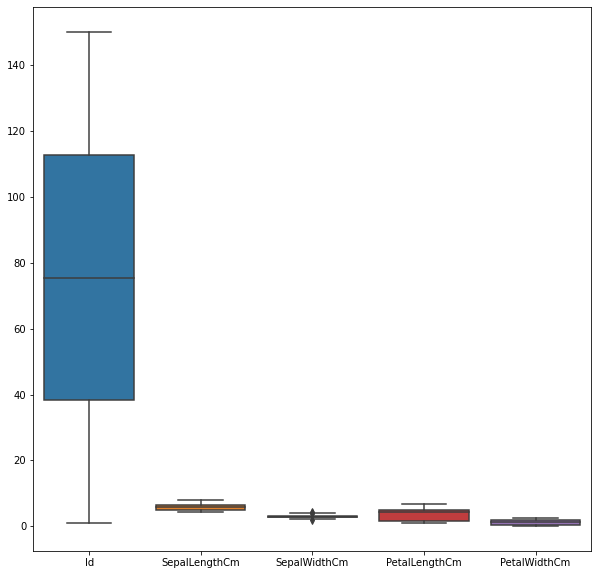

In [12]:
# Box plot of price
plt.figure(figsize= (10,10))
# sns.boxplot(data= iris_d)
sns.boxplot(data= iris_d,width = 0.8, fliersize = 5)
plt.show()
#plt.figure(figsize=(10,10))
#sns.set(rc={'figure.figsize':(5,20)})

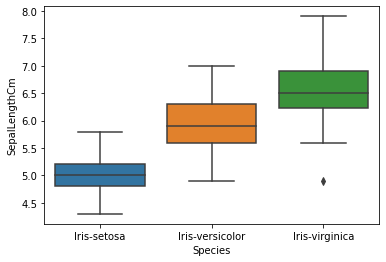

In [13]:
# To plot the Species data vs SepalLength using a box plot:

sns.boxplot(x="Species", y="SepalLengthCm", data=iris_d)
plt.show()

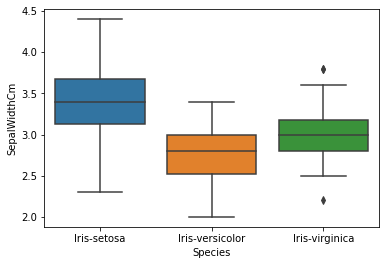

In [14]:
# To plot the Species data vs SepalWidth using a box plot:

sns.boxplot(x="Species", y="SepalWidthCm", data=iris_d)
plt.show()

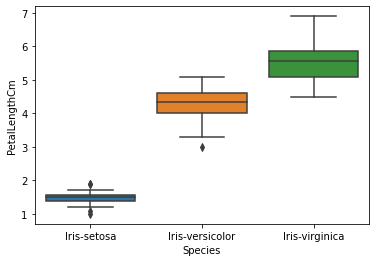

In [15]:
# To plot the Species data vs PetalLength using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=iris_d)
plt.show()

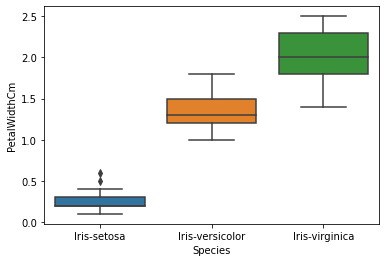

In [16]:
# To plot the Species data vs PetalWidth using a box plot:

sns.boxplot(x="Species", y="PetalWidthCm", data=iris_d)
plt.show()

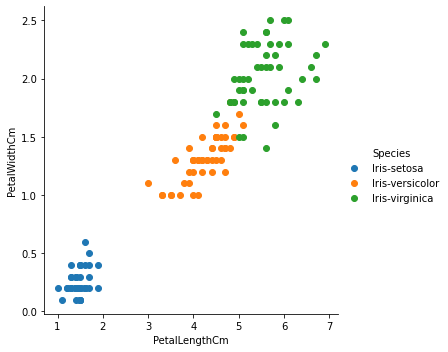

In [17]:
# Scatter Plot representing Species w.r.t PetalLength and PetalWidth

sns.FacetGrid(iris_d, hue= "Species", height = 5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
plt.show()

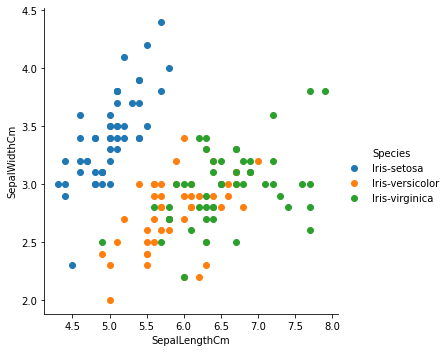

In [18]:
# Scatter Plot representing species w.r.t SepalLength and SepalWidth

sns.FacetGrid(iris_d, hue= "Species", height = 5).map(plt.scatter, 
                                                      "SepalLengthCm", 
                                                      "SepalWidthCm").add_legend()
plt.show()

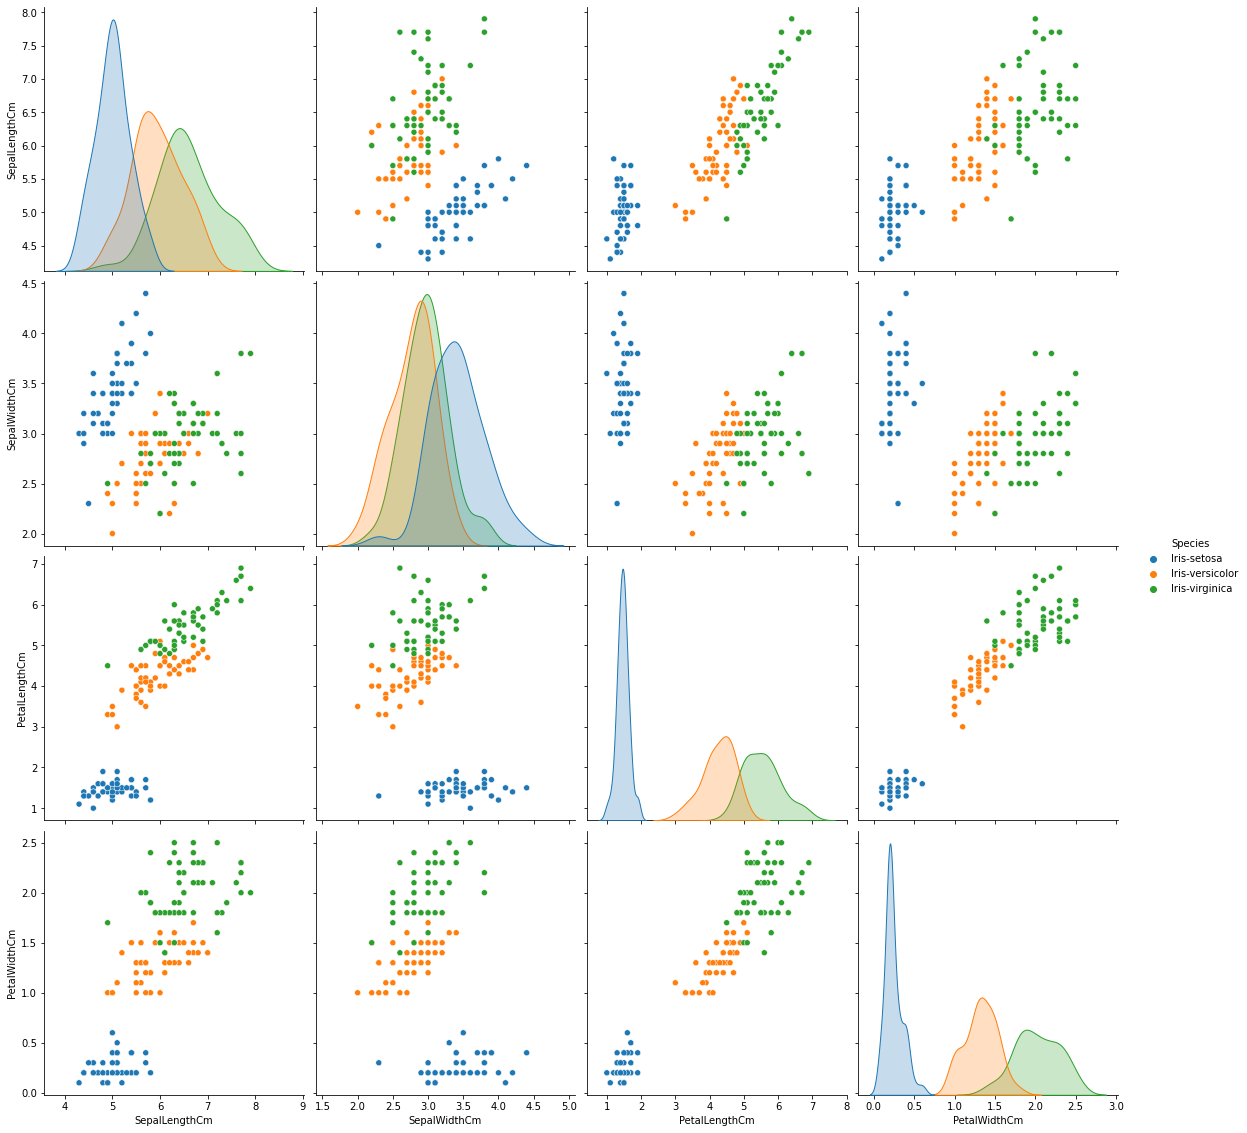

In [19]:
# Pairplot representing the relationship between species w.r.t. all parameters. 
# An perceptible pattern shows a close relationship between the two. 

sns.pairplot(iris_d.drop("Id", axis=1), hue="Species", height=4)
plt.show()

### The Correlation matrix

#### The correlation matrix represents the parameters and flower frameworks which are best correlated with each other. Here the researcher tried to find out strongest and weakest correlated pair (except the main diagonal).

In [20]:
# Correlation

iris_d.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [21]:
# Vizually appealing corr matrix
cor_iris = iris_d.corr()

#cor_iris.style.background_gradient(cmap = 'coolwarm')
cor_iris.style.background_gradient(cmap = 'viridis')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


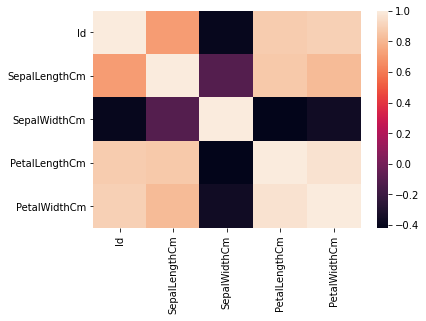

In [22]:
# Heatmap

sns.heatmap(cor_iris, 
            xticklabels=cor_iris.columns.values,
            yticklabels=cor_iris.columns.values)
plt.show()

#### Conclusion:: According to the above correlation matrix, PetalLengthCm and PetalWidthCm have strongest positive correlation.

In [23]:
# In order to run Naive_Bayes classifier, replace the "Species" values.

iris_d['Species'].replace("Iris-setosa",1,inplace= True)
iris_d['Species'].replace("Iris-virginica",2,inplace = True)
iris_d['Species'].replace("Iris-versicolor",3,inplace=True)

In [24]:
# Checking the Species values 

iris_d['Species'].unique()

array([1, 3, 2])

### Step 5: Splitting the data into Train Data and Test Data
#### For this step, firstly separate the 'Feature' and 'Target'variable from the data.

In [25]:
feature = iris_d.iloc[:, 0:4]
target = iris_d['Species']

# X = dataframe.iloc[:, 0:4]  
# Y = dataframe['Species']

In [26]:
# Splitting the data into Train and Test dataset

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.4, 
                                                    random_state = 40)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (90, 4)
X-Test : (60, 4)
Y-Train : (60,)
Y-Test : (60,)


### Step 6: Fitting the Model/ Applying the Algorithm

#### Here, the researcher has used 6 different model/algorithm to find out the best fit.

#### 1. K – Nearest Neighbour (KNN)

In [27]:
KN_model = KNeighborsClassifier()
KN_model.fit(X_train, y_train)
pred_vals_KN = KN_model.predict(X_test)
print(accuracy_score(y_test, pred_vals_KN))
pred_vals_KN

1.0


array([1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       3, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2,
       2, 1, 2, 2, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 2, 2])

In [28]:
# This dataframe gives the Actual vs Predicted values

dfIris_d = pd.DataFrame(pred_vals_KN, index = range(60,), columns = ['Predicted'])
dfIris_d['Actual'] = y_test
dfIris_d   

,Predicted,Actual
0,1,NaN
1,3,NaN
2,2,1.0
3,2,1.0
4,3,NaN
5,2,NaN
6,3,1.0
7,3,NaN
8,3,NaN
9,1,1.0


### Evaluating the Performance of the Model

In [29]:
print('Mean Absolute Error =', mean_absolute_error(y_test, pred_vals_KN))
print("Mean Squared Error= ", mean_squared_error(y_test, pred_vals_KN))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, pred_vals_KN)))

Mean Absolute Error = 0.0
Mean Squared Error=  0.0
Root Mean Squared Error=  0.0


### 2. Support Vector Machine (SVM)

In [30]:
Support_vm = SVC()
Support_vm.fit(X_train, y_train)
pred_vals_SVC = Support_vm.predict(X_test)
print(accuracy_score(y_test, pred_vals_SVC))
pred_vals_SVC

0.9833333333333333


array([1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       3, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2,
       2, 1, 2, 2, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2])

In [31]:
# This dataframe gives the Actual vs Predicted values

dfIris_d = pd.DataFrame(pred_vals_SVC, index = range(60,), columns = ['Predicted'])
dfIris_d['Actual'] = y_test
dfIris_d   

,Predicted,Actual
0,1,NaN
1,3,NaN
2,2,1.0
3,2,1.0
4,3,NaN
5,2,NaN
6,3,1.0
7,3,NaN
8,3,NaN
9,1,1.0


### Evaluating the Performance of the Model

In [32]:
print('Mean Absolute Error =', mean_absolute_error(y_test, pred_vals_SVC))
print("Mean Squared Error= ", mean_squared_error(y_test, pred_vals_SVC))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, pred_vals_SVC)))

Mean Absolute Error = 0.016666666666666666
Mean Squared Error=  0.016666666666666666
Root Mean Squared Error=  0.12909944487358055


### 3. RandomForest

In [33]:
RF_model = RandomForestClassifier(n_estimators=5)
RF_model.fit(X_train, y_train)
pred_vals_RF = RF_model.predict(X_test)
print(accuracy_score(y_test, pred_vals_RF))
pred_vals_RF

1.0


array([1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       3, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2,
       2, 1, 2, 2, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 2, 2])

In [34]:
# This dataframe gives the Actual vs Predicted values

dfIris_d = pd.DataFrame(pred_vals_RF, index = range(60,), columns = ['Predicted'])
dfIris_d['Actual'] = y_test
dfIris_d  

,Predicted,Actual
0,1,NaN
1,3,NaN
2,2,1.0
3,2,1.0
4,3,NaN
5,2,NaN
6,3,1.0
7,3,NaN
8,3,NaN
9,1,1.0


### Evaluating the Performance of the Model

In [35]:
print('Mean Absolute Error =', mean_absolute_error(y_test, pred_vals_RF))
print("Mean Squared Error= ", mean_squared_error(y_test, pred_vals_RF))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, pred_vals_RF)))

Mean Absolute Error = 0.0
Mean Squared Error=  0.0
Root Mean Squared Error=  0.0


### 4. Logistic Regression

In [36]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
pred_vals_LR = LR_model.predict(X_test)
print(accuracy_score(y_test, pred_vals_LR))
pred_vals_LR

1.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       3, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2,
       2, 1, 2, 2, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 2, 2])

In [37]:
# This dataframe gives the Actual vs Predicted values

dfIris_d = pd.DataFrame(pred_vals_LR, index = range(60,), columns = ['Predicted'])
dfIris_d['Actual'] = y_test
dfIris_d  

,Predicted,Actual
0,1,NaN
1,3,NaN
2,2,1.0
3,2,1.0
4,3,NaN
5,2,NaN
6,3,1.0
7,3,NaN
8,3,NaN
9,1,1.0


### Evaluating the Performance of the Model

In [38]:
print('Mean Absolute Error =', mean_absolute_error(y_test, pred_vals_LR))
print("Mean Squared Error= ", mean_squared_error(y_test, pred_vals_LR))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, pred_vals_LR)))

Mean Absolute Error = 0.0
Mean Squared Error=  0.0
Root Mean Squared Error=  0.0


### 5. Gaussian Naive Bayes

In [39]:
#Train and test model
GNB_model = GaussianNB()
GNB_model.fit(X_train ,y_train)
pred_vals_GNB = GNB_model.predict(X_test)
print(accuracy_score(y_test, pred_vals_GNB))
pred_vals_GNB

1.0


array([1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       3, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2,
       2, 1, 2, 2, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 2, 2])

In [40]:
# This dataframe gives the Actual vs Predicted values

dfIris_d = pd.DataFrame(pred_vals_GNB, index = range(60,), columns = ['Predicted'])
dfIris_d['Actual'] = y_test
dfIris_d    

,Predicted,Actual
0,1,NaN
1,3,NaN
2,2,1.0
3,2,1.0
4,3,NaN
5,2,NaN
6,3,1.0
7,3,NaN
8,3,NaN
9,1,1.0


### Evaluating the Performance of the Model

In [41]:
print('Mean Absolute Error =', mean_absolute_error(y_test, pred_vals_GNB))
print("Mean Squared Error= ", mean_squared_error(y_test, pred_vals_GNB))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, pred_vals_GNB)))

Mean Absolute Error = 0.0
Mean Squared Error=  0.0
Root Mean Squared Error=  0.0


### Conclusion:: Among all models, Support Vector Machine gives 98.33% accuracy and the mean absolute error is 1.6% whereas other models gives perfect model fit. Though in Machine Learning, there is no specific model which gives 100% result accuracy of the dataset. This dataset apart from Support Vector Machine, gives 100% accuracy, which is nearly impossible. 
### What do you think regarding the same? Kindly provide your valuable feedback in the comment section.